<a href="https://colab.research.google.com/github/LeonButterworth/MiniPix-Internship-Leon/blob/main/Paper_spectra_and_speed_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
############################################################################
# For an experiment where you measure the number of particles (specfically alphas) with and without a piece of paper blocking either the detector or the alpha emitting source
# need to import 4 files - Frame of all particles detected without paper
#                        - Frame of all particles detected with paper
#                        - Energy spectra without paper
#                        - Energy spectra with paper
############################################################################

from google.colab import files
uploaded = files.upload()

Saving All Frames - with paper.txt to All Frames - with paper.txt
Saving All Frames - without paper.txt to All Frames - without paper.txt
Saving Energy With.txt to Energy With.txt
Saving Energy Without.txt to Energy Without.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

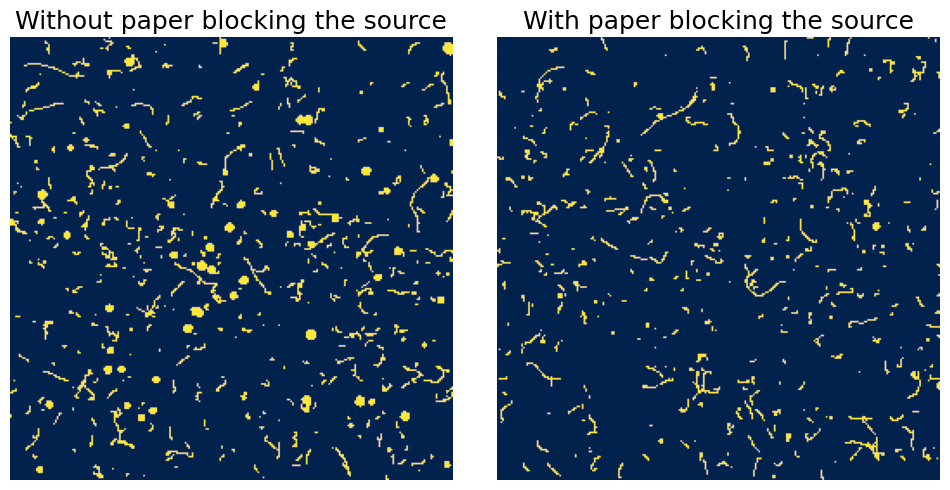

In [ ]:
############################################################################
# get the "with paper" and "without paper" frames
# show an image of the two frames side by side for comparison
############################################################################

import numpy as np
from PIL import Image 
import pandas as pd
from matplotlib import pyplot as plt

# get data from the frame where there is no paper blocking the source
file_without = open('All Frames - without paper.txt')
data = pd.read_table(file_without, header=None, delimiter=' ', nrows=256) 
data = data.iloc[:, :]
rows, cols = data.shape
na = np.array(data)

# plot the frames to get an image
plt.figure(figsize=(12, 8), dpi=100)

plt.subplots_adjust(wspace= 0.1)

plt.subplot(1,2,1)
plt.title("Without paper blocking the source",size=18)
plt.imshow(na>0, origin="lower", cmap="cividis")
plt.axis('off')

# get data from the frame where there is paper blocking the source
file_with = open('All Frames - with paper.txt')
data = pd.read_table(file_with, header=None, delimiter=' ', nrows=256) 
data = data.iloc[:, :]
rows, cols = data.shape
na = np.array(data)

# plot the frames to get an image
plt.subplot(1,2,2)
plt.title("With paper blocking the source",size=18)
plt.imshow(na>0, origin="lower", cmap="cividis")
plt.axis('off')

# Downloads the image
plt.savefig("Frames.jpg",dpi=100, bbox_inches='tight',pad_inches = 0.03)
files.download("Frames.jpg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

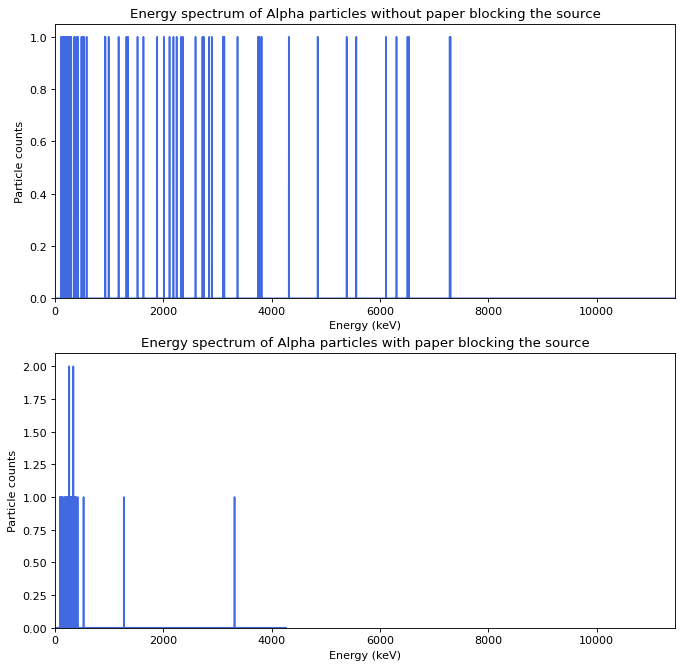

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

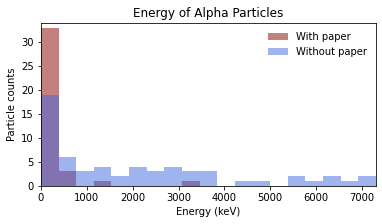

### Total Energy ###
Total energy without paper = 127132.0 KeV
Total energy with paper = 13429.0 KeV

### Total number of particles detected ###
61.0 Alpha particles detected without paper
38.0 Alpha particles detected with paper

### Average Energy ###
Average energy without paper = 2084.0 KeV
Average energy with paper = 353.0 KeV

### Maximum speed of particles ###
Maximum speed without paper = 0.062 c (6.2% the speed of light)
Maximum speed with paper = 0.042 c (4.2% the speed of light)

### Average speed of particles ###
Average speed without paper = 0.033 c (3.3% the speed of light)
Average speed with paper = 0.014 c (1.4% the speed of light)


In [ ]:
############################################################################
# Takes energy spectra and produces of both cases and produces a bar chart that shows the distribution of energies between the two cases
# Calculates the average and maximum speed of all aplha particles detected
############################################################################

# read in spectra data for spectras with paper
file_energy_with = open('Energy With.txt')
Lines_energy_with = file_energy_with.read().splitlines()  

particles = 'Alpha'

# put data into an array
energy_spectra_with = [] 
for line_energy_with in Lines_energy_with:
  tmpline_energy_with = line_energy_with.split('\t')
  energy_spectra_with.append([float(x) for x in np.array(tmpline_energy_with[:-1])])

# read in spectra data for spectras without paper
file_energy_without = open('Energy Without.txt')
Lines_energy_without = file_energy_without.read().splitlines()  

# put data into an array
energy_spectra_without = [] 
for line_energy_without in Lines_energy_without:
  tmpline_energy_without = line_energy_without.split('\t')
  energy_spectra_without.append([float(x) for x in np.array(tmpline_energy_without[:-1])])

# get max value of spectra in x-axis, not the highest detection of a particle, the highest value the spectra goes to in x
max_without = max(energy_spectra_without[0])
max_with = max(energy_spectra_with[0])
max_value_x = max(max_with,max_without)

# append the energies of all "with paper" alphas to an array and get a running total of the energy
total_energy_with = 0
total_energy_with_values = []
for i in range(len(energy_spectra_with[0])):
    if energy_spectra_with[1][i] != 0:
      for j in range(int(energy_spectra_with[1][i])):
        total_energy_with += energy_spectra_with[0][i]
        total_energy_with_values.append(energy_spectra_with[0][i])

max_value_from_array_with = max(total_energy_with_values)

# append the energies of all "without paper" alphas to an array and get a running total of the energy
total_energy_without = 0
total_energy_without_values = []
for i in range(len(energy_spectra_without[0])):
    if energy_spectra_without[1][i] != 0:
      for j in range(int(energy_spectra_without[1][i])):
        total_energy_without += energy_spectra_without[0][i]
        total_energy_without_values.append(energy_spectra_without[0][i])

max_value_from_array_without = max(total_energy_without_values)


# plot the spectras how they're shown in Pixet
plt.figure(figsize=(10, 10), dpi=80)

plt.subplot(2,1,1)
 
plt.plot(energy_spectra_without[0],energy_spectra_without[1], color="royalblue")
plt.title("Energy spectrum of Alpha particles without paper blocking the source")
plt.xlabel("Energy (keV)")
plt.ylabel("Particle counts")
plt.xlim(0,max_value_x)
plt.ylim(0)


plt.subplot(2,1,2)
 
plt.plot(energy_spectra_with[0],energy_spectra_with[1], color="royalblue")
plt.title("Energy spectrum of Alpha particles with paper blocking the source")
plt.xlabel("Energy (keV)")
plt.ylabel("Particle counts")
plt.xlim(0,max_value_x)
plt.ylim(0)

# Downloads the image
plt.savefig("Energy spectra.jpg",dpi=100, bbox_inches='tight',pad_inches = 0.03)
files.download("Energy spectra.jpg")
plt.show()

# plot the two energy spectra as histograms to make them easier to see and compare
# get the maximum energy value so the limit on the x-axis can be set
hist_x_max_values = max(max_value_from_array_with, max_value_from_array_without)

bins = np.linspace(0,hist_x_max_values,20)

# n_with/n_without are the number of values in each bin, so im getting the max number so I can set the y limit
n_without, bins_without = np.histogram(total_energy_without_values, bins=bins)
n_with, bins_with = np.histogram(total_energy_with_values, bins=bins)
n = max(max(n_without),max(n_with))


plt.figure(figsize=(6, 3))

plt.hist(total_energy_with_values, bins=bins, label="With paper", alpha=0.5, color="darkred")
plt.hist(total_energy_without_values, bins=bins, label="Without paper", alpha=0.5,color="royalblue")

plt.title("Energy of Alpha Particles")
plt.xlabel("Energy (keV)")
plt.ylabel("Particle counts")
plt.legend(loc="upper right",edgecolor="none")
plt.xlim(0,hist_x_max_values)
plt.ylim(0,n+1)

# Downloads the image
plt.savefig("Energy histogram.jpg",dpi=100, bbox_inches='tight',pad_inches = 0.03)
files.download("Energy histogram.jpg")
plt.show()

# calcualting the speeds of the particles
# getting the total number of particles and the average energy of those particles
sum_with = sum(energy_spectra_with[1])
sum_without = sum(energy_spectra_without[1])
avg_with = total_energy_with / sum_with
avg_without = total_energy_without / sum_without

# using an equation to convert the energies into speeds
vel_avg_with = np.sqrt(1 - (1 / ((1 + (avg_with/3735000))**2)))
vel_max_with = np.sqrt(1 - (1 / ((1 + (max_value_from_array_with/3735000))**2)))
vel_avg_without = np.sqrt(1 - (1 / ((1 + (avg_without/3735000))**2)))
vel_max_without = np.sqrt(1 - (1 / ((1 + (max_value_from_array_without/3735000))**2)))

# printing the results
print("### Total Energy ###")
print("Total energy without paper =", total_energy_without, "KeV")
print("Total energy with paper =",total_energy_with, "KeV")
print()

print("### Total number of particles detected ###")
print(sum_without, "Alpha particles detected without paper")
print(sum_with, "Alpha particles detected with paper")
print()

print("### Average Energy ###")
print("Average energy without paper =", float(round(avg_without)), "KeV")
print("Average energy with paper =", float(round(avg_with)), "KeV")
print()

print("### Maximum speed of particles ###")
print("Maximum speed without paper = {:.3f} c ({:.1f}% the speed of light)".format(vel_max_without,vel_max_without*100))
print("Maximum speed with paper = {:.3f} c ({:.1f}% the speed of light)".format(vel_max_with,vel_max_with*100))
print()

print("### Average speed of particles ###")
print("Average speed without paper = {:.3f} c ({:.1f}% the speed of light)".format(vel_avg_without,vel_avg_without*100))
print("Average speed with paper = {:.3f} c ({:.1f}% the speed of light)".format(vel_avg_with,vel_avg_with*100))